In [1]:
# ml model 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# load data
data = pd.read_csv('model_features.csv')
data.drop(['Prospect ID'], axis=1, inplace=True)
data.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index'], axis=1, inplace=True)

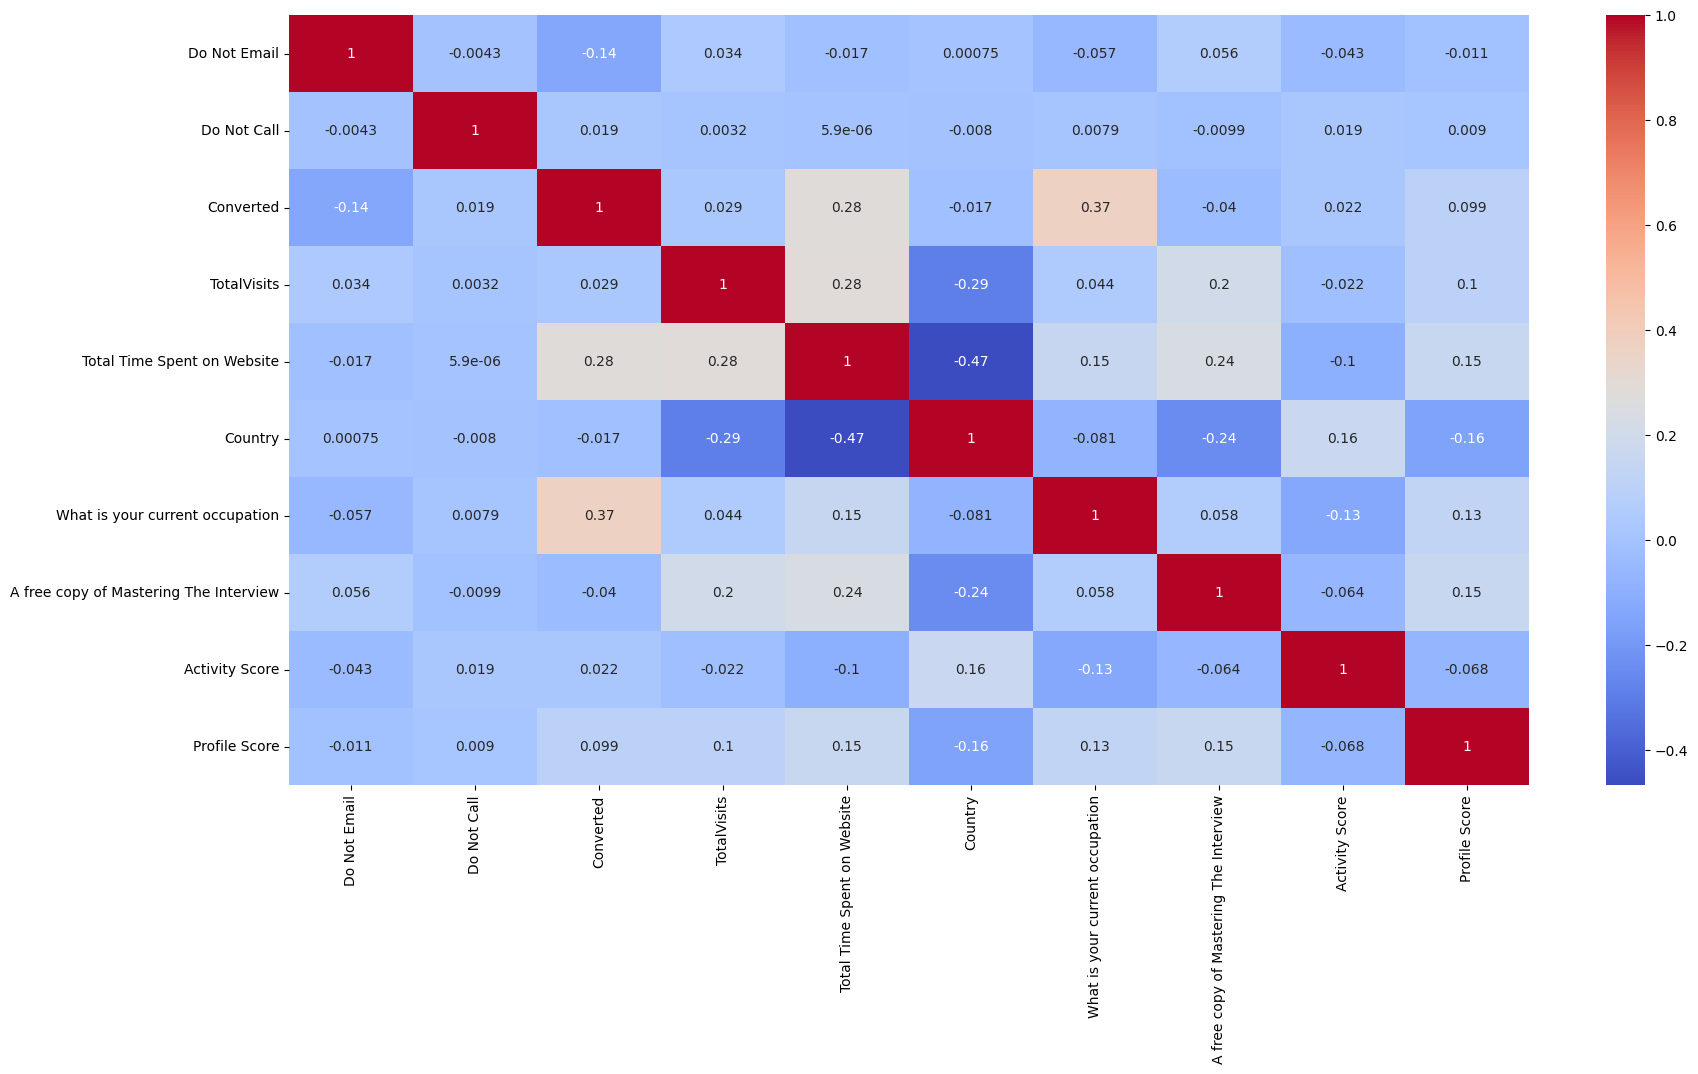

In [2]:
# correlation matrix
correlation = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


In [3]:
X = data.drop('Converted', axis=1)
y = data['Converted']
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# logisitic regression
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter=200, random_state=42)

model1.fit(X_train, y_train)

predictions = model1.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, predictions)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7218614718614719
Confusion Matrix:
[[930 177]
 [337 404]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1107
           1       0.70      0.55      0.61       741

    accuracy                           0.72      1848
   macro avg       0.71      0.69      0.70      1848
weighted avg       0.72      0.72      0.71      1848



In [5]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

model2= DecisionTreeClassifier(random_state=42)

model2.fit(X_train, y_train)

predictions = model2.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, predictions)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7570346320346321
Confusion Matrix:
[[947 160]
 [289 452]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1107
           1       0.74      0.61      0.67       741

    accuracy                           0.76      1848
   macro avg       0.75      0.73      0.74      1848
weighted avg       0.76      0.76      0.75      1848



In [6]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model3= RandomForestClassifier(random_state=42)

model3.fit(X_train, y_train)

predictions = model3.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, predictions)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7835497835497836
Confusion Matrix:
[[888 219]
 [181 560]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1107
           1       0.72      0.76      0.74       741

    accuracy                           0.78      1848
   macro avg       0.77      0.78      0.78      1848
weighted avg       0.79      0.78      0.78      1848



In [7]:
# XGBoost
import xgboost as xgb

model4 = xgb.XGBClassifier(random_state=42)

model4.fit(X_train, y_train)

predictions = model4.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, predictions)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7781385281385281
Confusion Matrix:
[[966 141]
 [269 472]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1107
           1       0.77      0.64      0.70       741

    accuracy                           0.78      1848
   macro avg       0.78      0.75      0.76      1848
weighted avg       0.78      0.78      0.77      1848



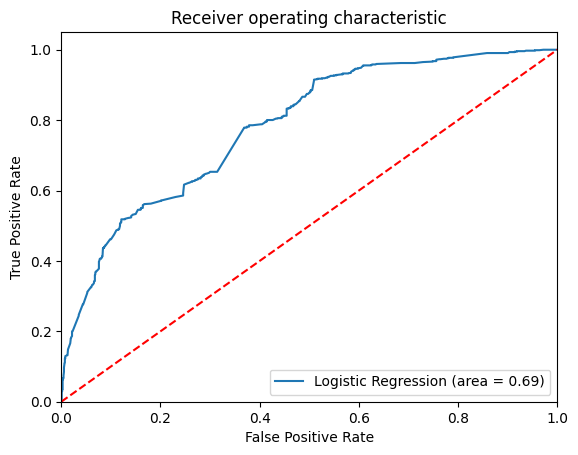

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()